<a href="https://colab.research.google.com/github/saulrubio75/1022_DAFT_MEX/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sn 
import matplotlib.pyplot as plt

import statsmodels.api as sm



In [3]:
train = pd.read_csv('/content/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('train types')
print(train.dtypes)  

print('train columns')
print(train.columns) 
print('train info')
print(train.info())

train types
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
train columns
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'Low

In [5]:

train.transpose()


,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [6]:
train2 = train[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea','MiscVal','SalePrice']]


In [7]:

train2.isnull().sum()



LotFrontage     259
LotArea           0
TotalBsmtSF       0
GrLivArea         0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageArea        0
PoolArea          0
MiscVal           0
SalePrice         0
dtype: int64

In [8]:
train2.fillna(train.mean(), inplace=True) 
train2.isnull().sum()

<ipython-input-8-a86545494113>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train2.fillna(train.mean(), inplace=True)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


LotFrontage     0
LotArea         0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
PoolArea        0
MiscVal         0
SalePrice       0
dtype: int64

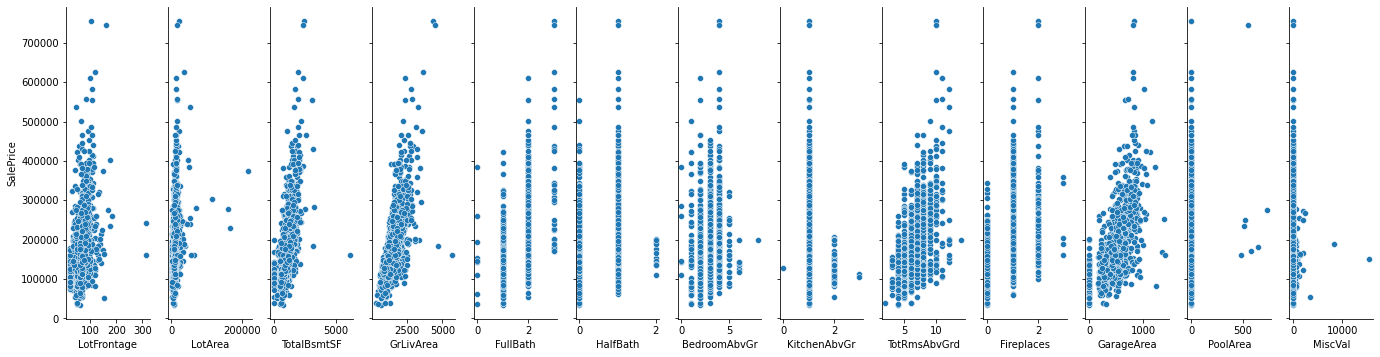

In [9]:
not_salesprice = train2[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea','MiscVal']]
individualFig=sn.pairplot(train2,x_vars=not_salesprice, y_vars=['SalePrice'], height = 5, aspect=0.3)



In [10]:
train_cor= train2.corr()  
train_cor 


,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.306795,0.363358,0.368392,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.323663,0.180868,0.001168,0.334901
LotArea,0.306795,1.000000,0.260833,0.263116,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.180403,0.077672,0.038068,0.263843
TotalBsmtSF,0.363358,0.260833,1.000000,0.454868,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.486665,0.126053,-0.018479,0.613581
GrLivArea,0.368392,0.263116,0.454868,1.000000,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.468997,0.170205,-0.002416,0.708624
FullBath,0.180424,0.126031,0.323722,0.630012,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.405656,0.049604,-0.014290,0.560664
HalfBath,0.048258,0.014259,-0.048804,0.415772,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.163549,0.022381,0.001290,0.284108
BedroomAbvGr,0.237023,0.119690,0.050450,0.521270,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.065253,0.070703,0.007767,0.168213
KitchenAbvGr,-0.005805,-0.017784,-0.068901,0.100063,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.064433,-0.014525,0.062341,-0.135907
TotRmsAbvGrd,0.320146,0.190015,0.285573,0.825489,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.337822,0.083757,0.024763,0.533723
Fireplaces,0.235755,0.271364,0.339519,0.461679,0.243671,0.203649,0.107570,-0.123936,0.326114,1.000000,0.269141,0.095074,0.001409,0.466929


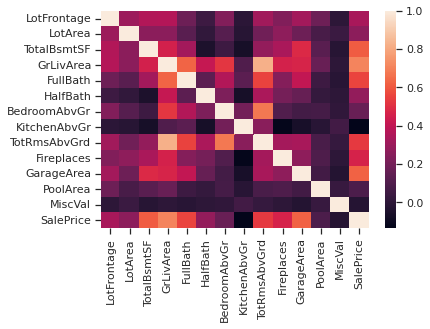

In [11]:
sn.set_theme(style='ticks')
sn.heatmap(train2.corr()) 

In [12]:
not_salespriceCor = train_cor[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','PoolArea','MiscVal']]
salespriceCor=train_cor['SalePrice'] 
salespriceCor

LotFrontage     0.334901
LotArea         0.263843
TotalBsmtSF     0.613581
GrLivArea       0.708624
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageArea      0.623431
PoolArea        0.092404
MiscVal        -0.021190
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [ ]:
mean_saleprice = train2['SalePrice'].mean() 
mean_saleprice 

180921.19589041095

In [ ]:
muestra_saleprice = train2['SalePrice'] < 200000
muestra_saleprice

0       False
1        True
2       False
3        True
4       False
        ...  
1455     True
1456    False
1457    False
1458     True
1459     True
Name: SalePrice, Length: 1460, dtype: bool

In [13]:
from statsmodels.formula.api import ols 

x = sm.add_constant(not_salesprice) 
y =train2.SalePrice

model = sm.OLS(y, x).fit()
prdictions= model.predict(x) 
summary = model.summary() 
summary

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     294.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:59:14   Log-Likelihood:                -17599.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1446   BIC:                         3.530e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.284e+04   7266.335      4.519      0.000    1.86e+04    4.71e+04
LotFrontage     11.8929     58.052      0.205      0.838    -101.981     125.767
LotArea          0.2441      0.119      2.043      0.041       0.010       0.479
TotalBsmtSF     45.0576      3.291     13.693      0.000      38.603      51.512
GrLivArea       45.2921      4.898      9.247      0.000      35.684      54.900
FullBath      2.563e+04   2687.792      9.537      0.000    2.04e+04    3.09e+04
HalfBath      1.224e+04   2599.249      4.709      0.000    7141.066    1.73e+04
BedroomAbvGr -1.756e+04   1921.805     -9.136      0.000   -2.13e+04   -1.38e+04
KitchenAbvGr -5.322e+04   5424.961     -9.810      0.000   -6.39e+04   -4.26e+04
TotRmsAbvGrd  7438.9490   1452.786      5.120      0.000    4589.156    1.03e+04
Fireplaces    9277.8127   2013.575      4.608      0.000    5327.972    1.32e+04
GarageArea      75.2451      6.497     11.582      0.000      62.501      87.989
PoolArea       -49.6353     28.162     -1.762      0.078    -104.878       5.607
MiscVal         -0.2528      2.215     -0.114      0.909      -4.598       4.092
==============================================================================
Omnibus:                      677.948   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72711.401
Skew:                          -1.182   Prob(JB):                         0.00
Kurtosis:                      37.492   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#I want to use the neighborhood column as a numerical,I have done a research for a raking of the best neighborhoods in Ammes City 

train['Neighborhood'].unique()




array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [15]:
#For this I get the ranking from this page https://www.neighborhoodscout.com/ia/ames, it only have some of the neigborhoods 
scale_neigbor = {'Somerst': 10,'NoRidge':10,  'SWISU':9, 'Blmngtn':8, 'CollgCr':7, 'Edwards':6, 'Timber':5, 'Veenker':4,
               'Crawfor':4, 'Mitchel':4, 'NWAmes': 4, 'OldTown':4,'BrkSide':4 , 'Sawyer':4,'NridgHt':4, 'NAmes':4,
                'SawyerW': 4, 'IDOTRR':4, 'MeadowV':4, 'Gilbert':4, 'StoneBr':4, 'ClearCr':4, 'NPkVill':4, 'BrDale':4, 
                'Blueste':4} 
scale_functional = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}   
    
scale_exter = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5} 

train2 = train[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                'GarageArea','PoolArea','MiscVal','SalePrice', 'Neighborhood', 'OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'Functional' ]] 
not_saleprice= train[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                'GarageArea','PoolArea','MiscVal', 'Neighborhood', 'OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'Functional' ]] 


def scale(s, dic): 
    return dic[s] 












    

In [16]:
train2['Functional'] = train2['Functional'].apply(lambda x: scale(x, scale_functional)) 
train2['Neighborhood'] = train2['Neighborhood'].apply(lambda x: scale(x, scale_neigbor)) 
train2['ExterQual'] = train2['ExterQual'].apply(lambda x: scale(x, scale_exter))
train2['ExterCond'] = train2['ExterCond'].apply(lambda x: scale(x, scale_exter))


<ipython-input-16-53f93854828d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['Functional'] = train2['Functional'].apply(lambda x: scale(x, scale_functional))
<ipython-input-16-53f93854828d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['Neighborhood'] = train2['Neighborhood'].apply(lambda x: scale(x, scale_neigbor))
<ipython-input-16-53f93854828d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [17]:
train2.head()

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,Functional
0,65.0,8450,856,1710,2,1,3,1,8,0,548,0,0,208500,7,7,5,4,3,7
1,80.0,9600,1262,1262,2,0,3,1,6,1,460,0,0,181500,4,6,8,3,3,7
2,68.0,11250,920,1786,2,1,3,1,6,1,608,0,0,223500,7,7,5,4,3,7
3,60.0,9550,756,1717,1,0,3,1,7,1,642,0,0,140000,4,7,5,3,3,7
4,84.0,14260,1145,2198,2,1,4,1,9,1,836,0,0,250000,10,8,5,4,3,7


Se encontro ya dandole escalas a las columnas categoricas y graficandolas que la verdadera relación con el precio es la calidad de los materiales. 

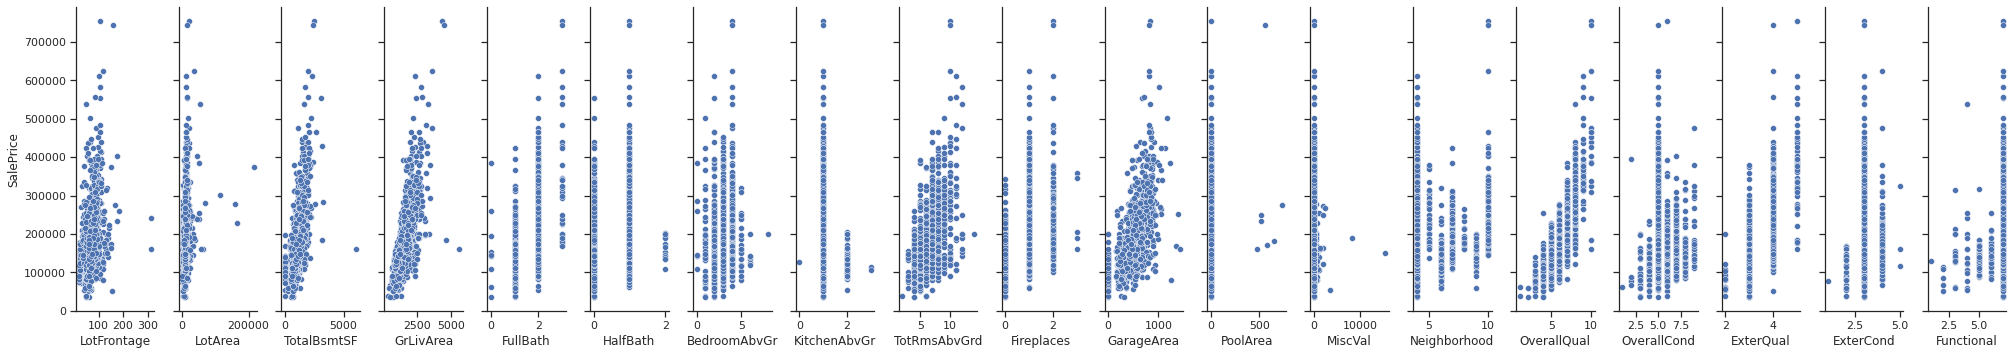

In [31]:
sn.pairplot(train2,x_vars=not_saleprice, y_vars=['SalePrice'], height = 5, aspect=0.3)



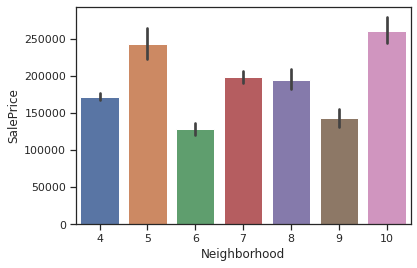

In [25]:
sn.barplot(x='Neighborhood', y='SalePrice', data=train2)

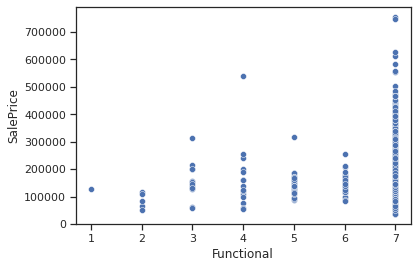

In [28]:
sn.scatterplot(data=train2, x='Functional', y='SalePrice')

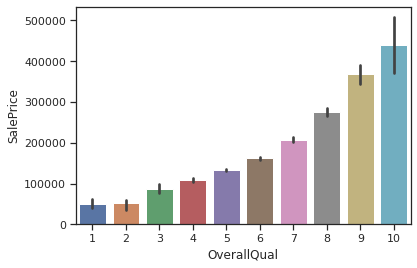

In [29]:
sn.barplot(x='OverallQual', y='SalePrice', data=train2)